<a href="https://colab.research.google.com/github/grzegorzkwolek/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/GKwolek_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = ([3505, 2400, 3027, 2798, 3700, 3250, 2689])
sales

[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def mean_var_standard(lst):
  mean = sum(lst) / len(lst)

  variance_lst = []
  for i in range(len(lst)):
    variance_element = (lst[i] - mean) **2
    variance_lst.append(variance_element)
  variance = sum(variance_lst) / len(lst)

  std_dev = np.sqrt(variance)
  
  return (mean, variance, std_dev);
  
#  print ("mean:", mean, "variance:", variance, "standard_dev:", std_dev)
#  print ("elements:", len(lst))

In [4]:
mean_var_standard(sales)

(3052.714285714286, 183761.06122448976, 428.67360686714756)

In [5]:
np.std(sales)

428.67360686714756

In [6]:
sales

[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
not_sales = ([2343, 4322, 4323, 3422, 4223, 4553, 5535, 5636, 7645])

In [8]:
mean_var_standard(not_sales)

(4666.888888888889, 1995484.7654320986, 1412.6162838620044)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = ([127, 80, 105, 92, 120, 115, 93])
sales = ([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [0]:
data = pd.DataFrame({"customers": customers, "sales": sales})

In [0]:
np.cov?

In [12]:
data_cov = np.cov(data["customers"], data["sales"], ddof=0)
data_cov = pd.DataFrame(data_cov)
data_cov

,0,1
0,249.387755,6518.020408
1,6518.020408,183761.061224


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [13]:
mean_var_standard(customers)

(104.57142857142857, 249.3877551020408, 15.792015549069118)

In [14]:
data_cov.iloc[0, 1]

6518.020408163265

In [15]:
mean_var_standard(customers)[2] * mean_var_standard(sales)[2]

6769.620265121536

In [16]:
cor_coef = (data_cov.iloc[0, 1]) / (mean_var_standard(customers)[2] * mean_var_standard(sales)[2])
cor_coef

0.9628339778148909

In [17]:
mean_var_standard(customers)[2]

15.792015549069118

In [18]:
mean_var_standard(sales)[2]

428.67360686714756

In [19]:
7604.357143 / (15.792015549069118*428.67360686714756)
# this is clearly wrong (the value shouldn't be higher than 1). Still working on it.

1.1233063074718088

In [20]:
data.corr()

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


In [21]:
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = ("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")
titanic = pd.read_csv(url)

In [0]:
numeric = (["Unnamed: 0", "pclass", "survived", "age", "sibsp", "parch", "fare", "body"])

In [0]:
titanic_num = titanic[["Unnamed: 0", "pclass", "survived", "age", "sibsp", "parch", "fare", "body"]]

In [25]:
titanic_num.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567


In [26]:
titanic_num.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

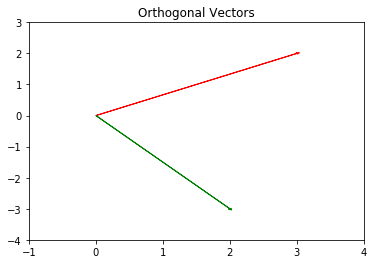

In [27]:
plt.arrow(0,0, 3, 2,head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 2, -3,head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,4)          
plt.ylim(-4,3)
plt.title("Orthogonal Vectors")
plt.show()

In [28]:
vect1 = [3, 2]
vect2 = [2, -3]
np.dot(vect1, vect2)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
VectA = [-5, 3, 7]
VectB = [6, -8, 2]

In [30]:
np.dot(VectA, VectB)
#these vectors are not orthogonal as their dot product doesn't equal 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
VectC = [2, -15, 6, 20]

In [32]:
np.linalg.norm(VectC)**2

665.0

In [33]:
np.dot(VectC, VectC)

665

In [34]:
np.transpose(VectC) * VectC

array([  4, 225,  36, 400])

norm is the square root of the sum of the squared elements of a vector. So if you square it, you get vector squared.

dot product is a scalar quantity that is equal to the sum of pair-wise products of the components of vectors a and b. dot product of the identical vectors is the "vector squared"

the sum of a vector elements multiplied by the transposed vector elements is the variance-covariance matrix. In this example the sum of the components equals 665.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$\mathbb{R}^2$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$\begin{align}
\vec{d} = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} +
\
12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
= 7 \hat{i} + 12\hat{j}
\end{align}$


$\mathbb{R}^3$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$,  $\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$


$\begin{align}
\vec{e} = 2 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} +11
\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} -8
\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2 \hat{i} + 11\hat{j} -8\hat{k}
\end{align}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
VectF = [4, 12, 11, 9, 2]

In [36]:
VectF_norm = np.linalg.norm(VectF)
VectF / VectF_norm

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

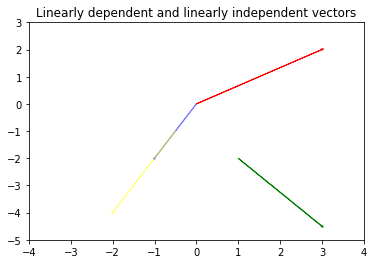

In [37]:
plt.arrow(0,0, 3, 2,head_width=.05, head_length=0.05, color ='red')
plt.arrow(1,-2 , 2, -2.5,head_width=.05, head_length=0.05, color ='green')
#red and green vectors are not lineaqrly dependent

plt.arrow(0,0, -1, -2,head_width=.05, head_length=0.05, color ='blue', alpha=0.5)
plt.arrow(-0.5, -1, -1.5, -3,head_width=.05, head_length=0.05, color ='yellow', alpha = 0.5)
# blue and yellow vectors are linearly dependent as they liue on exactly the same line  

plt.xlim(-4,4)          
plt.ylim(-5,3)
plt.title("Linearly dependent and linearly independent vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [38]:
GH_span = np.matrix("1 2; 4 8")
GH_span

matrix([[1, 2],
        [4, 8]])

In [39]:
np.linalg.det(GH_span)

0.0

I'd assume the space of these 2 vectors is the line defined as y = 2x; as they are not lineraly indenpendent, they can only span "a line" they are a part of.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [40]:
LMN_span = np.matrix("1 2 3; -1 0 7; 4 8 2")
LMN_span

matrix([[ 1,  2,  3],
        [-1,  0,  7],
        [ 4,  8,  2]])

In [41]:
np.linalg.det(LMN_span)

-19.999999999999996

In [42]:
np.linalg.matrix_rank(LMN_span)

3

In [0]:
LMN_trans = LMN_span.T

In [44]:
np.linalg.matrix_rank(LMN_trans)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



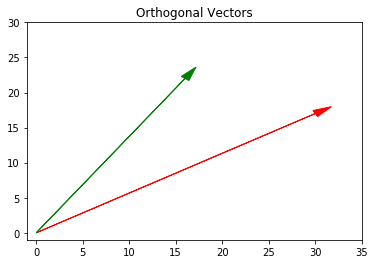

In [45]:
plt.arrow(0,0, 30, 17,head_width=1, head_length=2, color ='red')
plt.arrow(0,0, 16, 22,head_width=1, head_length=2, color ='green')
plt.xlim(-1, 35)          
plt.ylim(-1, 30)
plt.title("Orthogonal Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

It means the vectors are not linearly dependent and they span the vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [46]:
MatP = np.matrix("1 2 3; -1 0 7; 4 8 2")
MatP

matrix([[ 1,  2,  3],
        [-1,  0,  7],
        [ 4,  8,  2]])

In [47]:
np.linalg.matrix_rank(MatP)
#the ran of the matrix P is 3

3

## 7.2 What does the rank of a matrix tell us?

The rank of the matrix tells us about the dimensions this matrix can cover (rank being the number of dimensions)

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
vectV = [1, 3]
vectW = [-1, 2]

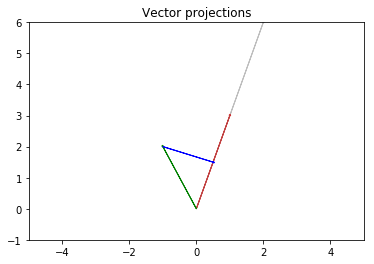

In [49]:
plt.arrow(0,0, 1, 3 ,head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 2, 6 ,head_width=.05, head_length=0.05, color ='grey', alpha = 0.5)
plt.arrow(0,0, -1, 2,head_width=.05, head_length=0.05, color ='green')
plt.arrow(-1,2, 1.5, -0.5,head_width=.05, head_length=0.05, color ='blue')

plt.xlim(-5,5)          
plt.ylim(-1,6)
plt.title("Vector projections")
plt.show()

In [50]:
c = np.dot(vectV, vectW)/np.dot(vectV, vectV)
c

0.5

In [51]:
proj = c*np.array(vectV)
proj
#this will be the blue vector

array([0.5, 1.5])

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

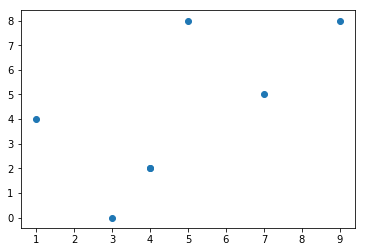

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()